In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Import RDD_data_MLDA_deaths.dta
df = pd.read_stata('RDD_data_MLDA_deaths.dta')

# Print the first 5 rows of df
df.head()

,age_in_years,agecell,all,internal,external
0,19.0,19.068493,92.825401,16.617590,76.207817
1,19.0,19.150684,95.100739,18.327684,76.773056
2,19.0,19.232876,92.144295,18.911053,73.233238
3,19.0,19.315069,88.427757,16.101770,72.325981
4,19.0,19.397261,88.704941,17.363520,71.341415


# #1

       age_in_years    agecell         all   internal   external
count     50.000000  50.000000   48.000000  48.000000  48.000000
mean      20.500000  21.000000   95.672729  20.285292  75.387436
std        1.111168   1.126957    3.831062   2.253907   2.986008
min       19.000000  19.068493   88.427757  15.977087  71.341415
25%       20.000000  20.075342   92.785927  18.597654  73.042023
50%       20.500000  20.999995   95.686272  20.288866  74.813248
75%       21.000000  21.924658   98.025749  21.976349  77.242348
max       22.000000  22.931507  105.268349  24.372910  83.330986


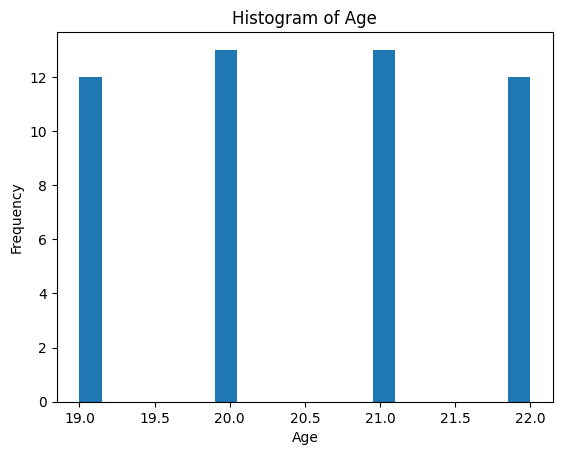

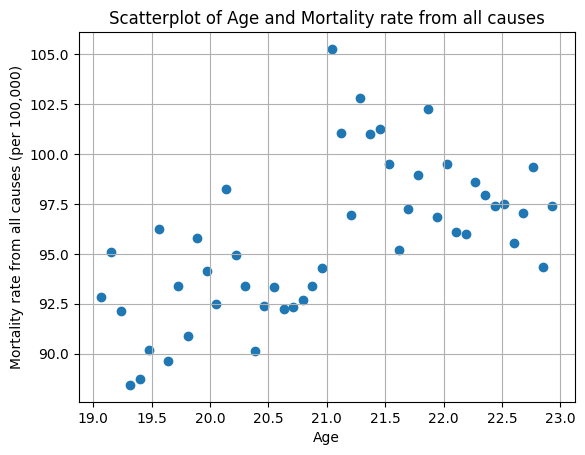

In [3]:
#Produce summary statistics for the main variables (age, overall death rate, and internal vs external causes of death) 
#using tables and a few plots that you think summarize the data well.
print(df.describe())

# Plot the histogram of age
plt.hist(df['age_in_years'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()
# Ta bort 19.5 20.5 21.5 i x-axeln

# Plot scatterplot of agecell and all (total death rate)
plt.scatter(df['agecell'], df['all'])
plt.xlabel('Age')
plt.ylabel('Mortality rate from all causes (per 100,000)')
plt.title('Scatterplot of Age and Mortality rate from all causes')
plt.grid()
plt.show()





# #2



**MLDA Influence on External Causes:**<br> Analyzing mortality causes specifically around this age may help assess the impact of the MLDA on external causes of death, such as accidents related to alcohol consumption (e.g., drunk driving incidents).

**Behavioral Changes at Legal Drinking Age:**<br> The legal ability to purchase and consume alcohol often corresponds with changes in behavior, including increased alcohol consumption. Focusing on the age range around 21 allows for an examination of how changes in alcohol-related behaviors might contribute to mortality rates, both internally and externally, excluding other possible changes.

# #3

**OLS:**<br>

$$Death Rate=\beta_{0}+\beta_{1}(Older than 21 Dummy)+\epsilon

**Issue with OLS:**<br> The problem arises because individuals who are just above and below the legal drinking age may differ in ways that are systematically related to mortality rates. These differences could be due to unobserved factors that affect both the MLDA status and mortality rates. If such factors are not included in the model, the estimated coefficient for the "Older than 21 Dummy" may be biased and not represent the true causal effect of the MLDA on mortality.

**Regression Discontinuity Design (RDD):**<br> A Regression Discontinuity Design (RDD) is a statistical approach that addresses this issue. In the context of MLDA, an RDD takes advantage of the fact that the legal drinking age creates a natural experiment where individuals just above and below the cutoff age are similar in observable and unobservable characteristics.

**How RD Helps:**<br> In an RDD, the regression equation is modified to include a term that captures the discontinuity at the MLDA cutoff. The equation might look like this:

$$Death Rate=\beta_{0}+\beta_{1}(Older than 21 Dummy)+\beta_{2}(Distance from MLDA)+\epsilon

**Where:**<br>

$$\beta_{2}:

- Captures the jump in mortality rates precisely at the MLDA cutoff.
- Distance from MLDA is a variable indicating how far an individual is from the legal drinking age.

By including the "Distance from MLDA" term, RDD helps control for the systematic differences between individuals just above and below the MLDA. This design allows for a more credible estimation of the causal effect of MLDA on mortality rates, mitigating biases associated with simple OLS models. The assumption is that any sudden changes in mortality rates around the legal drinking age are likely attributable to the change in MLDA rather than other confounding factors.

# #4

**Running Variable (Score):**<br>
Running variable: In this context, the running variable is the variable that determines the assignment to treatment or control groups. The running variable is usually the individual's age.

Score: The running variable is often referred to as the "score." In this case, the score is the individual's age.

**Cut-off:**<br>
The cut-off is the specific age at which individuals are subject to a change in the treatment, in our case 21 years old.

**Treatment:**<br>
The treatment refers to the condition or status that changes at the cut-off. In this case, the treatment is whether an individual is legally allowed to drink. Those just below the legal drinking age are treated differently from those just above the legal drinking age.

# #5

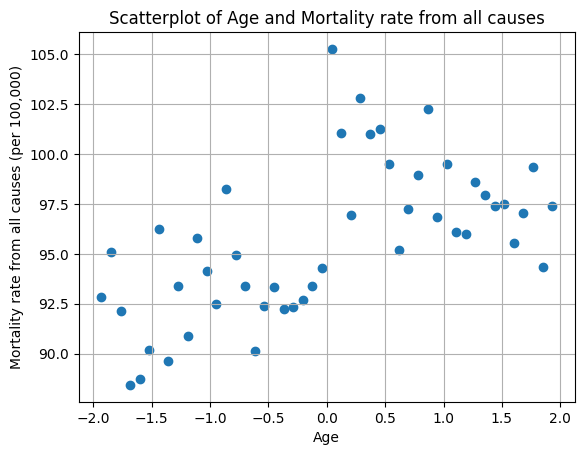

In [4]:
# Using the data I supply you with, re-center the running variable so 0 is at our cut-off.
# Then produce a scatterplot of our centered running variable against variable all.

# Create a new variable 'agecell_centered' by subtracting 21 from 'agecell'
df['agecell_centered'] = df['agecell'] - 21

# Plot scatterplot of agecell_centered and all (total death rate)
plt.scatter(df['agecell_centered'], df['all'])
plt.xlabel('Age')
plt.ylabel('Mortality rate from all causes (per 100,000)')
plt.title('Scatterplot of Age and Mortality rate from all causes')
plt.grid()
plt.show()

Comment: At the cut-off there is a certain increase in mortality rate. MORE

# #6

A sharp Regression Discontinuity Design (RDD) is a  strategy used in observational studies to estimate causal effects when there is a clear-cut assignment rule based on a continuous assignment variable. In a sharp RDD, the treatment status changes abruptly at a specific threshold or cut-off point of this continuous assignment variable. The key features of a sharp RDD include:

**Abrupt Change in Treatment:**<br> At the legal drinking age cut-off (e.g., 21 years old in the United States), individuals experience an abrupt change in treatment status. Those just below the legal drinking age are not legally allowed to drink, while those just above are granted that privilege.

**Continuous Assignment Variable:**<br> The continuous running variable is age. The legal drinking age is a clear threshold that determines whether an individual is treated as being of legal age to drink.

**Causal Inference:**<br> The design relies on the assumption that individuals just below and above the legal drinking age are similar in all relevant aspects, except for their legal ability to drink. Any observed differences in mortality rates around this cut-off can be attributed to the change in the MLDA.

# #7

$$DeathRate_{external} = \beta_{0}+\beta_{1}treatment + \beta_{2}agecell+\epsilon

In [5]:
# State the RD regression equations of two linear regressions and estimate these:
# 1) Treatment on external causes of death and
# 2) treatment on internal causes of death. Assume the same trends on each side of the cut-off.

# RD Regression equation 1) Treatment on external causes of death
# Add treatment column if agecell is equal or greater than 21
df['treatment'] = np.where(df['agecell'] >= 21, 1, 0)

# Drop missing values
df = df.dropna()

# Add treatment och agecell as independent variables
independent = df[['treatment', 'agecell']]
X = sm.add_constant(independent)

# Add external as dependent variable
model = sm.OLS(df['external'], X).fit()

# Print out the statistics and title
print('RD Regression equation 1) Treatment on external causes of death')
print(model.summary())

RD Regression equation 1) Treatment on external causes of death
                            OLS Regression Results                            
Dep. Variable:               external   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     13.99
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.89e-05
Time:                        12:01:37   Log-Likelihood:                -108.51
No. Observations:                  48   AIC:                             223.0
Df Residuals:                      45   BIC:                             228.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

$$DeathRate_{internal} = \gamma_{0}+\gamma_{1}treatment + \gamma_{2}agecell+\epsilon

In [6]:
# RD Regression equation 2) Treatment on internal causes of death
# Add treatment och agecell as independent variables
independent = df[['treatment', 'agecell']]

# Add treatment och agecell as independent variables
X = sm.add_constant(independent)

# Add internal as dependent variable
model = sm.OLS(df['internal'], X).fit()

# Print out the statistics and title
print("RD Regression equation 2) Treatment on internal causes of death")
print(model.summary())

RD Regression equation 2) Treatment on internal causes of death
                            OLS Regression Results                            
Dep. Variable:               internal   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     89.64
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.02e-16
Time:                        12:01:37   Log-Likelihood:                -68.062
No. Observations:                  48   AIC:                             142.1
Df Residuals:                      45   BIC:                             147.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

# #8

**Interpretation of external:**<br> 
**const (Intercept):**<br> The estimated intercept is 125.82. This is the expected value of the death rate from external causes when the treatment and age are zero.

**treatment**<br> The coefficient for the treament is 7.2708. This represents the change in the death rate from external causes associated ith being older than the legal drinking age. A positive coefficient suggests that being older than the legal drinking age is associated with a higher death rate from external causes. 

**agecell**<br> The coefficient for the variable agecell is -2.5748. This represents the estimated change in the death rate from external causes associated with a one-unit increase in age. A negative coefficient suggests that, irrespective of legal drinking age, older age is associated with a lower death rate from external causes.

**Summary:**<br>
The RD of treatment on external causes of death shows that there is a significant increase of death rate caused by external causes when treatment is 1. The death rate is decreasing when agecell increases which means the probability to die of external causes is decreasing when you're getting older. This assumption only applications for the age between 19 to 23.

**Interpretation of internal:**<br> 
**const (Intercept):**<br> The estimated intercept is -13.51. This is the expected value of the death rate from internal causes when the treatment and age are zero.

**treatment:**<br> The coefficient for the treatment variable is 0.3919. However, it is not statistically significant (p-value = 0.514). This suggests that being older than the legal drinking age is not associated with a significant change in the death rate from internal causes, holding age constant.

**agecell:**<br> The coefficient for agecell is 1.6001. This indicates that for each additional year in age, there is an increase of 1.6001 in the death rate from internal causes, holding the treatment constant. The age variable is statistically significant (p-value < 0.001).

**Why both?:**<br>
It is important to distinguish between internal and external causes of death because internals are mostly caused by diseases such as cancer for example, which is not caused by alcohol in the short run. Therefore, alcohol will mostly cause deaths due to external reasons such as car accidents. By seperating these, we get a stronger and clearer connection to each reason to deaths. MORE

# #9

In [7]:
# Reduce the considered bandwidth of the two regressions in question 7 and re-estimate the regression

# Define bandwidth reduction
bandwidth = 1

df_reduced = df[(df['agecell'] >= (21 - bandwidth)) & (df['agecell'] <= (21 + bandwidth))].copy()

# RD Regression equation 1) Treatment on external causes of death
# Add treatment column if agecell is equal or greater than 21
df_reduced['treatment'] = np.where(df_reduced['agecell'] >= 21, 1, 0)

# Drop missing values
df_reduced = df_reduced.dropna()

In [8]:
# RD Regression equation 1) Treatment on external causes of death

# Add treatment and agecell as independent variables
independent_reduced = df_reduced[['treatment', 'agecell']]
X_reduced = sm.add_constant(independent_reduced)

# Add external as the dependent variable and fit the model with heteroskedasticity robust standard errors
model_reduced_external = sm.OLS(df_reduced['external'], X_reduced).fit(cov_type="HC3")

# Print out the statistics and title
print('RD Regression equation 1) Treatment on external causes of death with reduced bandwidth')
print(model_reduced_external.summary())

RD Regression equation 1) Treatment on external causes of death with reduced bandwidth
                            OLS Regression Results                            
Dep. Variable:               external   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     16.84
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.32e-05
Time:                        12:01:37   Log-Likelihood:                -52.271
No. Observations:                  24   AIC:                             110.5
Df Residuals:                      21   BIC:                             114.1
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

In [9]:
# RD Regression equation 2) Treatment on internal causes of death

# Add treatment and agecell as independent variables
independent_reduced = df_reduced[['treatment', 'agecell']]
X_reduced = sm.add_constant(independent_reduced)

# Add external as the dependent variable and fit the model with heteroskedasticity robust standard errors
model_reduced_external = sm.OLS(df_reduced['internal'], X_reduced).fit(cov_type="HC3")

# Print out the statistics and title
print('RD Regression equation 2) Treatment on internal causes of death with reduced bandwidth')
print(model_reduced_external.summary())

RD Regression equation 2) Treatment on internal causes of death with reduced bandwidth
                            OLS Regression Results                            
Dep. Variable:               internal   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     8.928
Date:                Tue, 21 Nov 2023   Prob (F-statistic):            0.00156
Time:                        12:01:37   Log-Likelihood:                -30.208
No. Observations:                  24   AIC:                             66.42
Df Residuals:                      21   BIC:                             69.95
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

Our findings have maintained their robustness from the outset due to the inclusion of "cov_type='HC3'" in our code. Without this consideration, our results would have lacked robustness.

Here are some key differences between robust and non-robust regressions:

**Sensitivity to Outliers:**<br>

**Non-robust regressions:**<br> Ordinary Least Squares (OLS) methods are sensitive to outliers. If we have a few data points that deviate significantly from the overall trend, they can have a large impact on the results of the OLS regression.

**Robust regressions:**<br> These methods are designed to reduce the influence of outliers. They assign less weight to observations that are far from the expected trend, making them more resistant to outliers.


**Weighting of Observations:**<br>

**Non-robust regressions:**<br> Each observation is treated equally when calculating model parameters. This means that outliers can have a substantial impact on the results.

**Robust regressions:**<br> Observations are weighted differently based on their reliability or deviation. Outliers receive lower weight, and thus, they do not influence the results as much as in non-robust methods.

In summary, robust regressions are preferred when we have reason to believe that our data may contain outliers or when we want a model that is less sensitive to extreme observations. On the other hand, non-robust regression may be sufficient if we are confident that our data does not contain significant deviations. 

# #10

In [13]:
# RD Regression equation 1) Treatment on external causes of death with different trends
# Add treatment column if agecell is equal or greater than 21
df['treatment'] = np.where(df['agecell'] >= 21, 1, 0)

# Drop missing values
df = df.dropna()

# Create a variable for the difference between agecell and 21
df['age_diff'] = df['agecell'] - 21

# Interaction term: treatment * age_diff
df['interaction'] = df['treatment'] * df['age_diff']

# Add treatment, agecell, age_diff, and interaction as independent variables
independent_trends = df[['treatment', 'agecell', 'age_diff', 'interaction']]
X_trends = sm.add_constant(independent_trends)

# Add external as the dependent variable
model_external_trends = sm.OLS(df['external'], X_trends).fit(cov_type="HC3")

# Print out the statistics and title
print(f'\nRD Regression equation 1) Treatment on external causes of death with different trends')
print(model_external_trends.summary())



RD Regression equation 1) Treatment on external causes of death with different trends
                            OLS Regression Results                            
Dep. Variable:               external   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                 1.651e+04
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.99e-69
Time:                        12:04:11   Log-Likelihood:                -103.41
No. Observations:                  48   AIC:                             214.8
Df Residuals:                      44   BIC:                             222.3
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

In [12]:
# RD Regression equation 2) Treatment on internal causes of death with different trends
# Add internal as the dependent variable
model_internal_trends = sm.OLS(df['internal'], X_trends).fit(cov_type="HC3")

# Print out the statistics and title
print(f'\nRD Regression equation 2) Treatment on internal causes of death with different trends')
print(model_internal_trends.summary())


RD Regression equation 2) Treatment on internal causes of death with different trends
                            OLS Regression Results                            
Dep. Variable:               internal   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     4628.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.07e-57
Time:                        12:03:55   Log-Likelihood:                -68.060
No. Observations:                  48   AIC:                             144.1
Df Residuals:                      44   BIC:                             151.6
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

Including different trends before and after the cut-off can provide a more flexible model that better captures the underlying patterns in the data. This is especially relevant when there is evidence or suspicion that the relationship between the treatment and outcome variables may change abruptly at the cut-off point.

# #11

The question about the effect of increased alcohol consumption on mortality is different from the one above, as it involves a different causal relationship. In the previous analysis, we were examining the impact of being older than the legal drinking age (MLDA) on mortality rates, specifically focusing on external and internal causes of death. In contrast, the new question addresses the relationship between increased alcohol consumption and mortality.

The key differences are:

**Causal Relationship:**<br> The previous analysis focused on the causal effect of reaching the legal drinking age on mortality rates. The new question involves the causal relationship between increased alcohol consumption and mortality, which may or may not be directly influenced by age.

**Variable of Interest:**<br> In the first analysis, the primary variable of interest was the legal drinking age and its impact on mortality rates. In the new question, the variable of interest is the level of alcohol consumption and its association with mortality.

**Nature of the RD Design:**<br> The legal drinking age analysis was an example of a "sharp" Regression Discontinuity Design (RD) because the treatment (being older than the MLDA) was determined by a clear cut-off point (the legal drinking age). In the new question about alcohol consumption, it may not follow a sharp RD design because there might not be a clear-cut threshold that determines whether an individual has increased alcohol consumption.


**Assumptions:**<br>

**Previous Analysis:**<br> Assumed that individuals just above and just below the MLDA are similar, except for the legal ability to drink. This assumption is crucial for establishing a causal relationship.<br>
**New Question:**<br> The assumption of a clear discontinuity may not hold. The relationship between alcohol consumption and mortality may be influenced by various factors, and the impact may not be immediate or abrupt.

# #12

The conclusion to forbid all alcohol sales around your 18th birthday based on the investigation of the Minimum Legal Drinking Age (MLDA) may not be valid. Here's why:

**Causation vs. Correlation:**<br> The regressions conducted in Question 7 explore the relationship between being older than 21 (MLDA) and death rates from external and internal causes. The findings indicate associations, but causation is not established. It's essential to distinguish between correlation and causation.

**External Validity:**<br> The MLDA analysis focuses on a specific context (the legal drinking age) and may not directly generalize to a scenario where all alcohol sales are forbidden around the 18th birthday. The impact of a complete alcohol sales ban could be different from the effects observed in the MLDA context.

**Potential Unintended Consequences:**<br> Implementing a complete alcohol sales ban could have unintended consequences, including potential illegal alcohol consumption, black market activities, and impacts on social behavior. These consequences are not addressed in the MLDA analysis.